<a href="https://colab.research.google.com/github/Maximo8703/ProyectoDS_Partell_GomezMaximo/blob/main/ProyectoDS_Partelll_G%C3%B3mezM%C3%A1ximo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Presentación del proyecto**

**Presentación**

El mercado de valores de Estados Unidos es el más grande y el mas operado en el mundo, siendo un pilar fundamental para la economía global. El índice S&P 500, compuesto por las 500 mayores empresas que cotizan en bolsa en Estados Unidos. Este índice abarca diversos sectores, incluyendo tecnología, salud y finanzas, proporcionando una visión amplia y representativa de la economía. Para los analistas y los inversores, el S&P 500 es una referencia fundamental para tomar decisiones en su cartera de inversión, y para el gobierno de Estados Unidos también es útil para implementar políticas monetarias.

En el ámbito empresarial es clave poder predecir los movimientos del mercado para anticiparse a un cambio repentino en la cotización. Si bien me voy a enfocar en la cotización de Apple, comprender cómo el mercado de valores es influenciado por otras variables permite una mejor toma de decisiones en la gestión de carteras. Es el caso de que si se anticipa un cambio en la tasa de interés, los analistas pueden ajustar sus estrategias para amortiguar posibles caídas en el precio de una acción o índice. También este conocimiento puede ser importante para las empresas del rubro tecnológico que buscan comprender las dinámicas del mercado y ajustar sus políticas de inversión o expansión.

Este proyecto está dirigido tanto a personas adentradas en el mundo de las finanzas y la macroeconomía como para personas aficionadas interesados en estos campos.

**Preguntas/Hipótesis a Resolver**

Que tanto influyen el precio de otras acciones, en su mayoría del rubro de la tecnología, e indicadores macroeconómicos de Estados Unidos como la tasa de interés, la inflación mensual y el desempleo  en la cotización de Aaple (AAPL)

**Objetivo**

Este proyecto tiene como objetivo predecir el cambio en el precio de cotización en bolsa de Apple.

El enfoque se basa en analizar datos históricos de precios de acciones, que abarcan de 2008 a 2023, y diversos indicadores macroeconómicos. La metodología emplea un modelo de regresión logística multiclase para capturar la relación entre el estado de la acción objetivo y las características extraídas de otras acciones y variables económicas. Posteriormente, se implementa un enfoque de clasificación multiclase para categorizar los cambios en el precio de la acción en diferentes niveles de variación (desarrollo en la descripción de variables).



# **Lectura de datos**

**Librerias necesarias para el analisis de datos**

In [151]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.utils import resample

**Configuración del entorno de Python en Google Colab**

In [152]:
from google.colab import drive
drive.mount("/content/gdrive")

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


**Lectura del dataset**

In [153]:
syp_macro1 = pd.read_csv("/content/gdrive/MyDrive/ProyectoDS_Parte1_Gómez.ipynb/syp_macro1.csv")
syp_macro1["Date"] = pd.to_datetime(syp_macro1["Date"])

**Análisis inicial del dataset**

In [154]:
syp_macro1.shape

(4035, 20)

In [155]:
syp_macro1

,Date,AAPL,ADBE,AMZN,AMD,ACN,CSCO,TSLA,MSFT,MU,NVDA,GOOGL,IBM,INTC,ORCL,UNEMP_R,MENINF,INT_R,AAPL_PCT,var_day
0,2008-01-02,5.88314,41.71000,4.8125,7.14000,26.66109,17.99808,1.59267,25.53521,6.91418,0.75700,17.12724,57.89189,15.61201,18.30096,5.0,0.26960,4.25,0.04618,3
1,2008-01-03,5.88586,41.79000,4.7605,6.77000,26.20271,18.14050,1.59267,25.64396,6.82579,0.75104,17.13074,58.00801,15.19322,18.80548,5.0,0.26960,4.25,0.04618,3
2,2008-01-04,5.43656,40.36000,4.4395,6.25000,25.81084,17.71327,1.59267,24.92618,6.28562,0.68798,16.42259,55.92325,13.96151,17.92665,5.0,0.26960,4.25,-7.63350,1
3,2008-01-07,5.36379,40.24000,4.4410,6.08000,25.11585,17.72004,1.59267,25.09294,6.27580,0.61689,16.22887,55.32603,14.09084,18.10567,5.0,0.26960,4.25,-1.33851,2
4,2008-01-08,5.17085,39.22000,4.3940,6.00000,25.11585,17.24533,1.59267,24.25191,6.06955,0.62996,15.78969,53.96568,13.70900,17.21056,5.0,0.26960,4.25,-3.59717,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4030,2023-12-21,194.16852,600.14001,153.8400,139.91000,346.14087,48.91661,254.50000,372.17920,85.28337,48.98771,140.25902,157.76135,46.94241,105.11218,3.7,0.34024,5.50,-0.07700,3
4031,2023-12-22,193.09138,598.75000,153.4200,139.60001,351.79825,49.30046,252.53999,373.21542,86.29105,48.82771,141.32780,159.09583,47.85971,105.44978,3.7,0.34024,5.50,-0.55474,3
4032,2023-12-26,192.54282,598.26001,153.4100,143.41000,350.78586,49.48746,256.60999,373.29514,86.85973,49.27669,141.35777,160.14574,50.35241,105.43986,3.7,0.34024,5.50,-0.28410,3
4033,2023-12-27,192.64255,596.08002,153.3400,146.07001,351.17294,49.64494,261.44000,372.70728,86.46066,49.41468,140.20908,160.39105,50.61165,105.19162,3.7,0.34024,5.50,0.05180,3


In [ ]:
syp_macro1.sample(5)

,Date,AAPL,ADBE,AMZN,AMD,ACN,CSCO,TSLA,MSFT,MU,NVDA,GOOGL,IBM,INTC,ORCL,UNEMP_R,MENINF,INT_R,AAPL_PCT,var_day
1025,2012-01-25,13.48678,31.34000,9.3900,6.73,45.51424,13.64505,1.86467,23.41006,7.71953,0.34055,14.23516,114.03531,18.78475,23.78104,8.5,0.19574,0.25,6.24393,5
1397,2013-07-17,13.27215,48.04000,15.4345,4.38,61.82263,18.38831,8.01667,29.55153,13.34712,0.34100,22.96038,118.70960,17.80403,27.24342,7.3,0.16542,0.25,0.02555,3
453,2009-10-16,5.67812,35.67000,4.7660,5.74,29.95368,16.28915,1.59267,19.93834,7.80792,0.30317,13.74424,69.49711,13.10258,17.88026,10.0,0.09866,0.25,-1.31718,2
2218,2016-10-18,27.11978,108.42000,40.8825,6.73,103.64091,24.12268,13.27333,52.10273,17.09885,1.63879,41.02741,101.11385,30.90608,34.04582,5.0,0.20585,0.50,-0.06803,3
3511,2021-12-01,162.48067,657.40997,172.1860,149.11,347.11993,50.95241,365.00000,322.96075,83.74512,31.39023,140.88980,104.13219,45.54505,86.28529,3.9,0.39659,0.25,-0.32062,3


In [ ]:
syp_macro1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4035 entries, 0 to 4034
Data columns (total 20 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Date      4035 non-null   object 
 1   AAPL      4035 non-null   float64
 2   ADBE      4035 non-null   float64
 3   AMZN      4035 non-null   float64
 4   AMD       4035 non-null   float64
 5   ACN       4035 non-null   float64
 6   CSCO      4035 non-null   float64
 7   TSLA      4035 non-null   float64
 8   MSFT      4035 non-null   float64
 9   MU        4035 non-null   float64
 10  NVDA      4035 non-null   float64
 11  GOOGL     4035 non-null   float64
 12  IBM       4035 non-null   float64
 13  INTC      4035 non-null   float64
 14  ORCL      4035 non-null   float64
 15  UNEMP_R   4035 non-null   float64
 16  MENINF    4035 non-null   float64
 17  INT_R     4035 non-null   float64
 18  AAPL_PCT  4035 non-null   float64
 19  var_day   4035 non-null   int64  
dtypes: float64(18), int64(1), obje

In [ ]:
syp_macro1.columns

Index(['Date', 'AAPL', 'ADBE', 'AMZN', 'AMD', 'ACN', 'CSCO', 'TSLA', 'MSFT',
       'MU', 'NVDA', 'GOOGL', 'IBM', 'INTC', 'ORCL', 'UNEMP_R', 'MENINF',
       'INT_R', 'AAPL_PCT', 'var_day'],
      dtype='object')

**Descripción de variables**

**Date :**  Fecha de referencia

**Columnas 2 a 14**: Precios de acciones a saber;
Apple (AAPL),
Adobe (ADBE),
Amazon (AMZN),
Advanced Micro Devices (AMD),
Accenture (ACN),
Cisco Systems (CSCO),
Tesla (TSLA),
Microsoft (MSFT),
Micron Technology (MU),
NVIDIA (NVDA),
Alphabet (GOOGL),
IBM (IBM),
Intel (INTC),
Oracle (ORCL).

**UNEMP_R :** Tasa de desempleo mensual en Estados Unidos

**MENINF:** Tasa de inflación mensual en Estados Unidos

**INT_R:** Tasa de interés de la Reserva Federal de Estados Unidos

**AAPL_PCT:** Porcentaje de variación diaria de Apple

**var_day:** Clasificación del porcentaje de variación diaria de Apple, a saber;

[Crisis : 1 ] : Variación diaria mayor a -3.5%

[Baja : 2 ] : Variación diara entre -3.5% y -0.8%

[Estabilidad : 3 ] : Variación diaria entre -0.8% y 0.8%

[Alza : 4 ] : Variación diaria entre 0.8% y 3.5%

[Euforia : 5 ] : Variación diaria mayor a 3.5%

# **Limpieza y transformación de datos**

**Valores duplicados**

In [156]:
syp_macro1.duplicated().sum()

0

**Valores nulos**

En el caso de Tesla (TSLA), al comenzar a operar en bolsa en junio de 2010, decidí reemplazar todos los valores nulos por el precio de cotización en el primer día en la bolsa (1.59567)

In [157]:
syp_macro1.isnull().sum()

,0
Date,0
AAPL,0
ADBE,0
AMZN,0
AMD,0
ACN,0
CSCO,0
TSLA,0
MSFT,0
MU,0


**Outliers**

La tasa de interés y el precio de las acciones no modifiqué sus *outliers* por que es clave la decisión de politica monetaria para seguir los comportamientos del mercado.

En el caso de la inflación mensual reemplacé los *outliers* inferiores por el valor del primer cuartil de la columna. Para los *outliers* superiores decidí no reemplazarlos por su importancia en el cambio de precio de las acciones.

Para el desempleo, como los *outliers* son consecuencia del confinamiento en 2020, decidí reemplazarlos por el valor del tercer cuartil porque a pesar de ser una situación atípica los precios de las acciones también reaccionaron al confinamiento por lo que no quiero alterar posbiles patrones.

In [28]:
macro_outliers = syp_macro1[["UNEMP_R", "MENINF", "INT_R"]]
macro_outliers.head()

,UNEMP_R,MENINF,INT_R
0,5.0,0.2696,4.25
1,5.0,0.2696,4.25
2,5.0,0.2696,4.25
3,5.0,0.2696,4.25
4,5.0,0.2696,4.25


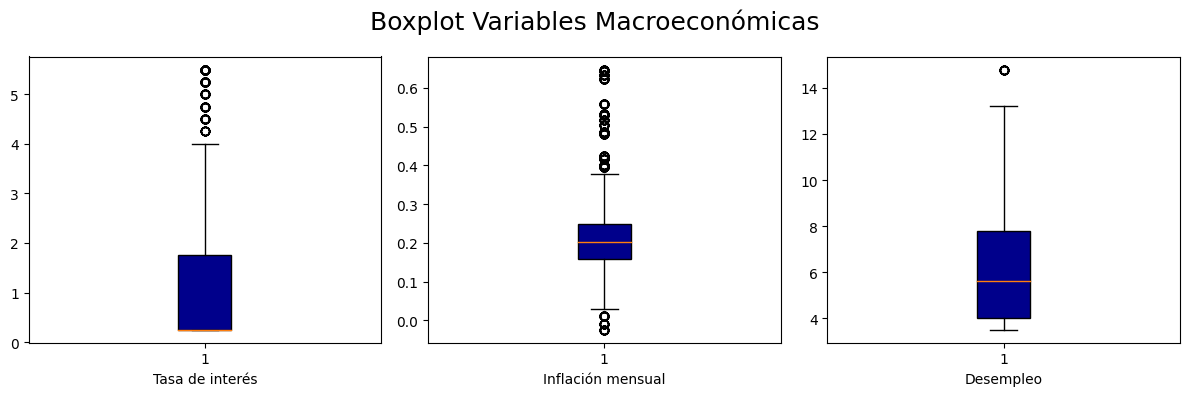

In [76]:
# Armado del gráfico de 1 fila y 3 columnas
fig, axs = plt.subplots(1, 3, figsize=(12, 4))

# Gráfico para la tasa de interés, desempleo e inflación mensual
axs[0].boxplot(syp_macro1["INT_R"], patch_artist=True, boxprops=dict(facecolor= "#00008B"))
axs[0].set_xlabel("Tasa de interés")

axs[1].boxplot(syp_macro1["MENINF"], patch_artist=True, boxprops=dict(facecolor= "#00008B"))
axs[1].set_xlabel("Inflación mensual")

axs[2].boxplot(syp_macro1["UNEMP_R"], patch_artist=True, boxprops=dict(facecolor= "#00008B"))
axs[2].set_xlabel("Desempleo")

fig.suptitle("Boxplot Variables Macroeconómicas", fontsize=18)

plt.tight_layout()

In [158]:
q1_meninf = syp_macro1["MENINF"].quantile(0.25)
syp_macro1.loc[(syp_macro1["MENINF"] < 0.16), "MENINF"] = q1_meninf

q3_unemp = syp_macro1["UNEMP_R"].quantile(0.75)
syp_macro1.loc[syp_macro1["UNEMP_R"] > 13, "UNEMP_R"] = q3_unemp

print("Inflación mensual Q1: ", q1_meninf )
print("\nDesempleo Q3: ", q3_unemp)

Inflación mensual Q1:  0.15877

Desempleo Q3:  7.8


**Reducción de dimensionalidad**

En busca de una optimización de los datos a utilizar, decidí eliminar las columnas que tengan una correlación mayor a 0.94 para evitar datos redundantes y que puedan entorpecer el modelo.

La decisión de tomar los valores por encima de la diagonal principal es para evitar los valores de "1" dentro de la misma además de prevenir la doble correlación por ser una matriz simétrica.

In [159]:
# Matriz de correlación
corr_matrix = syp_macro1.corr().abs()

# Valores por encima de la diagonal principal de la matriz de correlación
diag = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

# Columnas con correlación alta (0.94)
columns_drop = [column for column in diag.columns if any(diag[column] > 0.94)]

columns_drop

['AMZN', 'AMD', 'ACN', 'CSCO', 'TSLA', 'MSFT', 'MU', 'GOOGL', 'ORCL']

Text(0.5, 1.0, 'Matriz de Correlación')

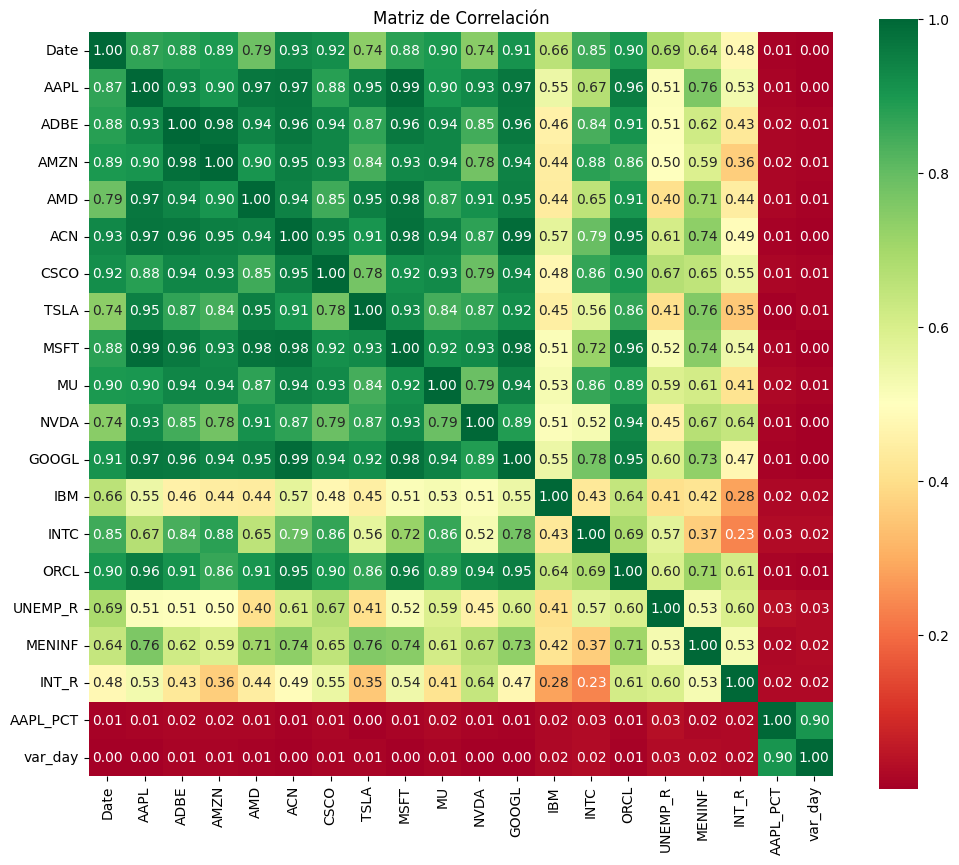

In [160]:
#Gráfico matriz de correlación via heatmap
syp_heat = syp_macro1.drop(columns=["Date"])

plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap="RdYlGn", fmt=".2f", square=True)
plt.title("Matriz de Correlación")

In [161]:
# Eliminar columnas
syp_macro2 = syp_macro1.drop(columns=columns_drop)

syp_macro2.head()

,Date,AAPL,ADBE,NVDA,IBM,INTC,UNEMP_R,MENINF,INT_R,AAPL_PCT,var_day
0,2008-01-02,5.88314,41.71,0.75700,57.89189,15.61201,5.0,0.2696,4.25,0.04618,3
1,2008-01-03,5.88586,41.79,0.75104,58.00801,15.19322,5.0,0.2696,4.25,0.04618,3
2,2008-01-04,5.43656,40.36,0.68798,55.92325,13.96151,5.0,0.2696,4.25,-7.63350,1
3,2008-01-07,5.36379,40.24,0.61689,55.32603,14.09084,5.0,0.2696,4.25,-1.33851,2
4,2008-01-08,5.17085,39.22,0.62996,53.96568,13.70900,5.0,0.2696,4.25,-3.59717,1


# **Análisis Exploratorio de Datos**

**Análisis multiclase**

En este gráfico se puede ver la frecuencia con la que suceden los distintos estados del mercado (crisis, baja, estabilidad, alza, euforia).

<ipython-input-162-438d9453bea3>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  grafico_barras = sns.countplot(data=syp_macro2, x= "var_day", palette="Spectral")
<ipython-input-162-438d9453bea3>:4: UserWarning: FixedFormatter should only be used together with FixedLocator
  grafico_barras.set_xticklabels(["Crisis","Baja", "Estabilidad", "Alza", "Euforia"]);


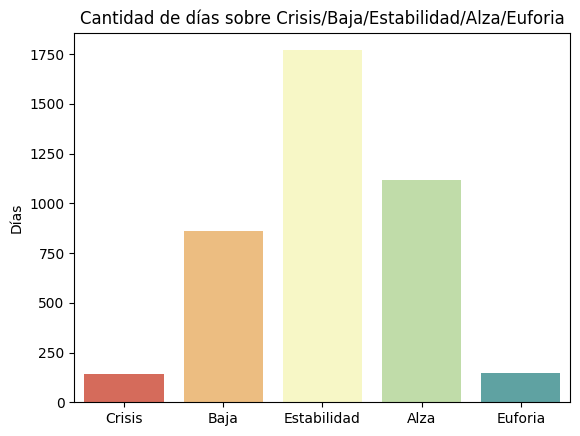

In [162]:
#Gráfico de barras de días por cada estado
grafico_barras = sns.countplot(data=syp_macro2, x= "var_day", palette="Spectral")
grafico_barras.set(title="Cantidad de días sobre Crisis/Baja/Estabilidad/Alza/Euforia", ylabel ="Días", xlabel="")
grafico_barras.set_xticklabels(["Crisis","Baja", "Estabilidad", "Alza", "Euforia"]);

**Conclusiones del Análisis Exploratorio de Datos**

En el gráfico se puede ver como la mayoría de días el mercado estuvo estable, seguido por una frecuencia similar a la alza y a la baja para terminar con los casos atípicos de la crisis y euforia.

El gráfico cumple con un comportamiento común en el mercado de acciones.

# **Preprocesamiento de datos**

**Codificación de variables categóricas**

Todas las *features* son numéricas a excepción de "Date" por lo que no es necesario realizar una codificación

#**Feature Selection**

**Selección de variable objetivo y variables independientes**

In [163]:
#Elección de variables independientes X y variable objetivo y.
X = syp_macro2.drop(columns = ["var_day", "Date"], axis = 1)
y = syp_macro2["var_day"]

In [164]:
print("Columnas de X e Y")
print(X.columns, y.name)

print("\nCantidad de nulos en X:")
print(X.isnull().sum())

print("\nCantidad de nulos en Y:")
print(y.isnull().sum())

Columnas de X e Y
Index(['AAPL', 'ADBE', 'NVDA', 'IBM', 'INTC', 'UNEMP_R', 'MENINF', 'INT_R',
       'AAPL_PCT'],
      dtype='object') var_day

Cantidad de nulos en X:
AAPL        0
ADBE        0
NVDA        0
IBM         0
INTC        0
UNEMP_R     0
MENINF      0
INT_R       0
AAPL_PCT    0
dtype: int64

Cantidad de nulos en Y:
0


# **Modelado**

**Conjuntos de entrenamiento y prueba**

In [165]:
#Establezco 60% datos de prueba y 40% datos de entrenamiento
X_train , X_test,  y_train, y_test = train_test_split(X, y, test_size=0.6, random_state=42)

In [166]:
#Modelo de regresión logística, para problemas multiclase y solver adecuado para un tamaño de datos mediano
model = LogisticRegression(multi_class="multinomial", solver="lbfgs")

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


**Evaluación del rendimiento del modelo**

In [167]:
print(classification_report(y_pred=y_pred, y_true=y_test))

              precision    recall  f1-score   support

           1       0.00      0.00      0.00        80
           2       0.78      0.61      0.69       529
           3       0.79      0.96      0.87      1086
           4       0.82      0.88      0.85       637
           5       0.00      0.00      0.00        89

    accuracy                           0.80      2421
   macro avg       0.48      0.49      0.48      2421
weighted avg       0.74      0.80      0.76      2421



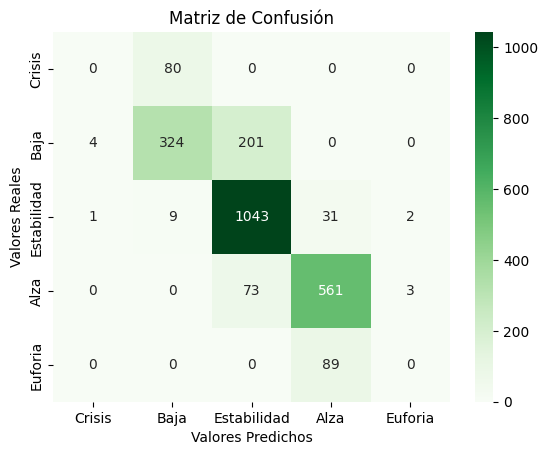

In [168]:
# Matriz de confusión via heatmap
confusion = confusion_matrix(y_test, y_pred)
graf = sns.heatmap(confusion, annot=True, cmap="Greens", fmt="d")

# Etiquetas del eje x e y
graf.set(title="Matriz de Confusión", ylabel ="Valores Reales", xlabel="Valores Predichos")
graf.set_xticklabels(["Crisis", "Baja", "Estabilidad", "Alza", "Euforia"])
graf.set_yticklabels(["Crisis", "Baja", "Estabilidad", "Alza", "Euforia"])

plt.show()

**Conclusión sobre el modelado y las métricas**

El modelo demostró un rendimiento muy bueno en la predicción de las clases "estabilidad" y "alza", logrando altas puntuaciones en las métricas. Sin embargo, el rendimiento en las demás clases es pobre. Esto se debe a que estas clases tienen un número limitado de muestras en el conjunto de entrenamiento, como resultado, las predicciones para estas clases son imprecisas y poco confiables.

#**Optimización de modelos**

Como las clases se encuentran desbalanceadas, esto provoca un empeoramiento de las métricas debido a las pocas muestras de las menos frecuentes.

Por eso tomé la decisión de utilizar SMOTE para poder equilibrar la cantidad de muestras.

In [169]:
#Modelo optimizado via SMOTE

opt_mod = SMOTE(random_state=42)

X_resampled, y_resampled = opt_mod.fit_resample(X, y)

<ipython-input-170-3213c4ed8acd>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  grafico_smote = sns.countplot(x=y_resampled, palette="Spectral")
<ipython-input-170-3213c4ed8acd>:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  grafico_smote.set_xticklabels(["Crisis","Baja", "Estabilidad", "Alza", "Euforia"]);


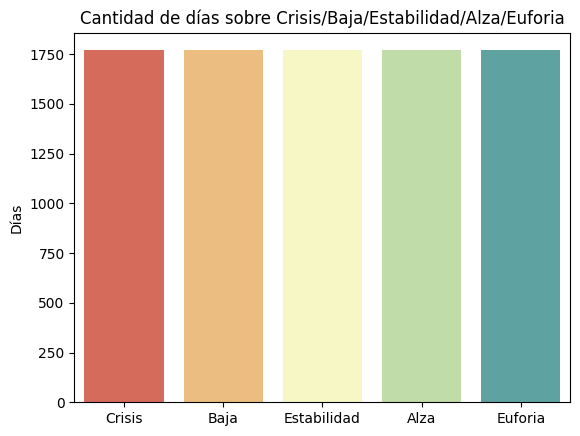

In [170]:
#Gráfico con frecuencias equilibradas

grafico_smote = sns.countplot(x=y_resampled, palette="Spectral")
grafico_smote.set(title="Cantidad de días sobre Crisis/Baja/Estabilidad/Alza/Euforia", ylabel = "Días", xlabel='')
grafico_smote.set_xticklabels(["Crisis","Baja", "Estabilidad", "Alza", "Euforia"]);

In [171]:
#Modifico el conjuntro de prueba al 30% por que ahora la cantidad de datos es mayor

X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.3, random_state=42, shuffle=True)

In [172]:
#Modelo de regresión logística, para problemas multiclase y solver adecuado para un tamaño de datos mediano
model = LogisticRegression(multi_class="multinomial", solver="lbfgs")

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


**Evaluación del rendimiento con SMOTE**

In [173]:
print(classification_report(y_pred=y_pred, y_true=y_test))

              precision    recall  f1-score   support

           1       0.88      0.94      0.91       525
           2       0.79      0.79      0.79       520
           3       0.83      0.74      0.78       540
           4       0.81      0.82      0.82       542
           5       0.89      0.94      0.91       527

    accuracy                           0.84      2654
   macro avg       0.84      0.84      0.84      2654
weighted avg       0.84      0.84      0.84      2654



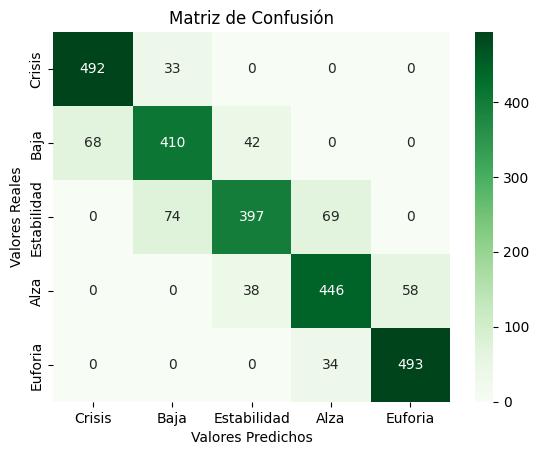

In [174]:
# Matriz de confusión via heatmap
confusion = confusion_matrix(y_test, y_pred)
graf = sns.heatmap(confusion, annot=True, cmap="Greens", fmt="d")

# Etiquetas del eje x e y
graf.set(title="Matriz de Confusión", ylabel ="Valores Reales", xlabel="Valores Predichos")
graf.set_xticklabels(["Crisis", "Baja", "Estabilidad", "Alza", "Euforia"])
graf.set_yticklabels(["Crisis", "Baja", "Estabilidad", "Alza", "Euforia"])

plt.show()

**Conclusión sobre la optimización**

Ahora sí el modelo predice con precisión las 5 categorías.

Es para destacar el gran desempeño para predecir las clasificaciones "Crisis" y "Euforia", que a mi parecer, se debe a que en esos casos hay tan solo una categoría posible en caso de errar la predicción ya que "Estabilidad" queda lejos con los parámetros establecidos.

En este caso, el modelo predice mejor a medida que se va alejando de "Estabilidad". Todo lo contrario al modelo inicial.

# **Conclusiones Finales**

Bajo el análisis de modelo se llega a la conclusión de que se puede predecir la variación del precio de la acción de Apple mediante indicadores macroeconómicos y el precio de otras acciones.

El mayor desafío que se puede tener para maximizar este modelo, es la correcta elección de indicadores macroeconómicos así como también tener la mayor paridad posible de frecuencias por clasificación.

Indicadores como la tasa de interés, la inflación y el desempleo sumado con el comportamiento de otras acciones tecnológicas, generan patrones que bajo su estudio se pueden ver como afectan a cotización de Apple. Al correlacionar estos datos, el modelo proporciona herramientas para evaluar el impacto de la política monetaria y la situación económica en el precio de las acciones.